In [1]:
import abacus_cosmos.Halos as ach
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import glob
from collections import Counter
import scipy.ndimage as scpimg
import h5py

%matplotlib inline

In [2]:
halo_data = ach.read_halos_FoF("/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100")

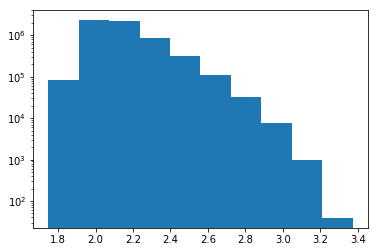

In [3]:
_ = plt.hist(np.log10(halo_data['vcirc_max']), log=True)

In [4]:
ii = halo_data['vcirc_max']>300.0
v_x = halo_data['vel'][:,0]

jj = (halo_data['vcirc_max']>219)&(halo_data['vcirc_max']<221)
pos_MW = halo_data['pos'][jj,:]
print(np.count_nonzero(jj))

16943


In [5]:
int_pos_MW = np.int_((pos_MW+(720/2.0))/2.0)

In [6]:
int_pos_MW

array([[ 15, 357,  78],
       [ 88, 354, 198],
       [ 37, 352,  63],
       ...,
       [299, 194,  60],
       [340, 205, 133],
       [303, 205,   1]])

(array([1.0000e+01, 1.8000e+01, 7.8000e+01, 3.1400e+02, 1.4110e+03,
        5.0180e+03, 1.4898e+04, 3.4780e+04, 5.7450e+04, 6.5402e+04,
        4.9959e+04, 2.7192e+04, 1.0511e+04, 3.2450e+03, 8.5300e+02,
        2.4200e+02, 4.7000e+01, 1.8000e+01, 4.0000e+00, 2.0000e+00]),
 array([-1756.2117  , -1567.9973  , -1379.783   , -1191.5685  ,
        -1003.3541  ,  -815.1398  ,  -626.92535 ,  -438.71097 ,
         -250.49658 ,   -62.282196,   125.93219 ,   314.14658 ,
          502.36096 ,   690.5753  ,   878.78973 ,  1067.0042  ,
         1255.2185  ,  1443.4329  ,  1631.6472  ,  1819.8617  ,
         2008.076   ], dtype=float32),
 <a list of 20 Patch objects>)

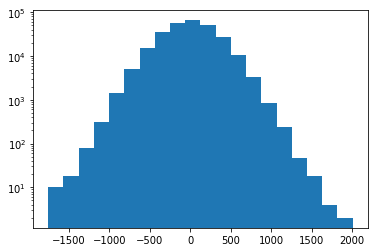

In [7]:
plt.hist(v_x[ii], bins=20, log=True)

In [8]:
halo_data['pos'].min()

-359.99985

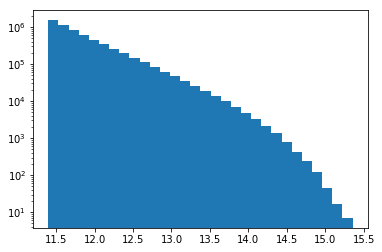

In [9]:
_=plt.hist(np.log10(halo_data['N']*1E10), log=True, bins=30)

In [10]:
filename = "/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_3.0_nside_360.hdf5"
f = h5py.File(filename, 'r')
div_test = f['divergence'][...]
vel_x = f['vel_x'][...]
vel_y = f['vel_y'][...]
vel_z = f['vel_z'][...]
f.close()

In [27]:
div_MW = []
for i in range(len(int_pos_MW)):
    div_MW.append(div_test[int_pos_MW[i,0] , int_pos_MW[i,1], int_pos_MW[i,2]])
div_MW = np.array(div_MW)

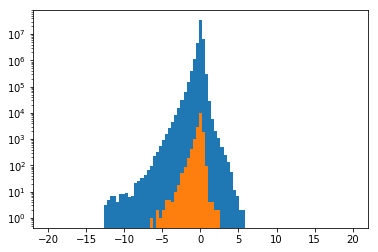

In [26]:
_ = plt.hist(div_test.flatten(), bins=np.linspace(-20,20,100), log=True)
_ = plt.hist(div_MW, bins=np.linspace(-20,20,100), log=True)

In [30]:
print(np.mean(div_MW), np.std(div_MW))
print(np.mean(div_test), np.std(div_test))

-0.1349775563171039 0.45508935592870114
2.9940994052305318e-18 0.30342050510475227


In [ ]:
_=plt.hist(vel_x.flatten(), bins=np.linspace(-40,40,100), log=True)

In [ ]:
filename = "/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/watershed_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_1.0_nside_72.hdf5"
f = h5py.File(filename, 'r')
ws_test = f['watershed_group'][...]
f.close()

In [ ]:
np.shape(ws_test), np.shape(div_test)

In [ ]:
slice_id=46

plt.subplot(1,2,1)
plt.imshow(div_test[:,:,slice_id])
plt.grid(False)


plt.subplot(1,2,2)
plt.imshow(ws_test[:,:,slice_id], cmap='Spectral')
plt.grid(False)

In [ ]:
c = Counter(ws_test.flatten())

In [ ]:
group_ids = np.array(list(c.keys()))
size_group = np.array(list(c.values()))

In [ ]:
_=plt.hist(np.log10(size_group*10**3), log=True)
plt.vlines(np.log10(100**3), 1, 1E3)

In [ ]:
ii_largest = np.argmax(size_group)
id_largest = group_ids[ii_largest]
print(id_largest)

In [ ]:
not_largest = np.argwhere(ws_test!=0)
largest = np.argwhere(ws_test==0)
print(np.shape(largest))
#_=plt.hist(largest[:,0])
#_=plt.hist(largest[:,1])
_=plt.hist(largest[:,2])

In [ ]:
slice_id=45

tmp_div_test = div_test.copy()

tmp_div_test[not_largest]=0.0
plt.imshow(div_test[:,:,slice_id])
#plt.colorbar()
plt.imshow(ws_test[:,:,slice_id], cmap='Paired', alpha=0.3)
plt.grid(False)


In [ ]:
plt.scatter(largest[:,0], largest[:,1])

In [ ]:
plt.scatter(largest[:,1], largest[:,2])

In [ ]:
div = {}

filename = "../data/AbacusCosmos_720box_planck_00_0_rockstar_halos/z0.1/fields/velocity_AbacusCosmos_720box_planck_00_0_rockstar_vmax_200.0_sigma_1.0_nside_360.hdf5"
f = h5py.File(filename, 'r')
div["200_1"] = f['divergence'][:,:,:]
f.close()

filename = "../data/AbacusCosmos_720box_planck_00_0_rockstar_halos/z0.1/fields/velocity_AbacusCosmos_720box_planck_00_0_rockstar_vmax_300.0_sigma_1.0_nside_360.hdf5"
f = h5py.File(filename, 'r')
div["300_1"] = f['divergence'][:,:,:]
f.close()

filename = "../data/AbacusCosmos_720box_planck_00_0_rockstar_halos/z0.1/fields/velocity_AbacusCosmos_720box_planck_00_0_rockstar_vmax_400.0_sigma_1.0_nside_360.hdf5"
f = h5py.File(filename, 'r')
div["400_1"] = f['divergence'][:,:,:]
f.close()


filename = "../data/AbacusCosmos_720box_planck_00_0_rockstar_halos/z0.1/fields/velocity_AbacusCosmos_720box_planck_00_0_rockstar_vmax_200.0_sigma_4.0_nside_360.hdf5"
f = h5py.File(filename, 'r')
div["200_4"] = f['divergence'][:,:,:]
f.close()

filename = "../data/AbacusCosmos_720box_planck_00_0_rockstar_halos/z0.1/fields/velocity_AbacusCosmos_720box_planck_00_0_rockstar_vmax_300.0_sigma_4.0_nside_360.hdf5"
f = h5py.File(filename, 'r')
div["300_4"] = f['divergence'][:,:,:]
f.close()

filename = "../data/AbacusCosmos_720box_planck_00_0_rockstar_halos/z0.1/fields/velocity_AbacusCosmos_720box_planck_00_0_rockstar_vmax_400.0_sigma_4.0_nside_360.hdf5"
f = h5py.File(filename, 'r')
div["400_4"] = f['divergence'][:,:,:]
f.close()

In [ ]:
z_slice = 109
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.imshow(div["200_1"][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='speed (km/s)')

plt.subplot(2,3,4)
_ = plt.hist(div["200_1"][z_slice,:,:].flatten(), bins=np.linspace(-70,50,50), log=True)


plt.subplot(2,3,2)
plt.imshow(div["300_1"][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='divergencia (km/s/Mpc/h)')

plt.subplot(2,3,5)
_ = plt.hist(div["300_1"][z_slice,:,:].flatten(), bins=np.linspace(-70,50,50), log=True)


plt.subplot(2,3,3)
plt.imshow(div["400_1"][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='divergencia (km/s/Mpc/h)')

plt.subplot(2,3,6)
_ = plt.hist(div["400_1"][z_slice,:,:].flatten(), bins=np.linspace(-70,50,50), log=True)


In [ ]:
z_slice = 109
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.imshow(div["200_4"][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='speed (km/s)')

plt.subplot(2,3,4)
_ = plt.hist(div["200_4"][z_slice,:,:].flatten(), bins=np.linspace(-10,10,50), log=True)


plt.subplot(2,3,2)
plt.imshow(div["300_4"][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='divergencia (km/s/Mpc/h)')

plt.subplot(2,3,5)
_ = plt.hist(div["300_4"][z_slice,:,:].flatten(), bins=np.linspace(-10,10,50), log=True)


plt.subplot(2,3,3)
plt.imshow(div["400_4"][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='divergencia (km/s/Mpc/h)')

plt.subplot(2,3,6)
_ = plt.hist(div["400_4"][z_slice,:,:].flatten(), bins=np.linspace(-10,10,50), log=True)


In [ ]:
z_slice = 10
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(div[200][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='speed (km/s)')


plt.subplot(1,3,2)
plt.imshow(div[300][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='divergencia (km/s/Mpc/h)')


plt.subplot(1,3,3)
plt.imshow(div[400][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='divergencia (km/s/Mpc/h)')

In [ ]:
z_slice = 10
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(water[200][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='speed (km/s)')


plt.subplot(1,3,2)
plt.imshow(water[300][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='divergencia (km/s/Mpc/h)')


plt.subplot(1,3,3)
plt.imshow(water[400][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='divergencia (km/s/Mpc/h)')

In [ ]:
L_cell = 10.0
volume_laniakea = 4*((180*0.7/2))**3
f = water[400].flatten()
f = f[f!=-1]
c = Counter(f)
vol = np.array(list(c.values()))*L_cell**3

_= plt.hist(vol, log=True, bins=40)

volume_laniakea = 4*((160*0.7/2))**3
plt.axvline(x=volume_laniakea, color='red')
volume_laniakea_min = 4*((155*0.7/2))**3
plt.axvline(x=volume_laniakea_min, color='red')
volume_laniakea_max = 4*((165*0.7/2))**3
plt.axvline(x=volume_laniakea_max, color='red')

n_laniakea = np.count_nonzero((vol<volume_laniakea_max) & (vol>volume_laniakea_min))
print(n_laniakea)

In [ ]:
L_cell = 10.0
volume_laniakea = 4*((180*0.7/2))**3

f = water[200].flatten()
f = f[f!=-1]
c = Counter(f)
vol_a = np.array(list(c.values()))*L_cell**3



f = water[300].flatten()
f = f[f!=-1]
c = Counter(f)
vol_b = np.array(list(c.values()))*L_cell**3


f = water[400].flatten()
f = f[f!=-1]
c = Counter(f)
vol_c = np.array(list(c.values()))*L_cell**3


_= plt.hist(vol_a, log=True, bins=np.linspace(1,2E6,50))
_= plt.hist(vol_b, log=True, bins=np.linspace(1,2E6,50))
_= plt.hist(vol_c, log=True, bins=np.linspace(1,2E6,50))


volume_laniakea = 4*((160*0.7/2))**3
plt.axvline(x=volume_laniakea, color='red')
volume_laniakea_min = 4*((155*0.7/2))**3
plt.axvline(x=volume_laniakea_min, color='red')
volume_laniakea_max = 4*((165*0.7/2))**3
plt.axvline(x=volume_laniakea_max, color='red')

n_laniakea = np.count_nonzero((vol<volume_laniakea_max) & (vol>volume_laniakea_min))
print(n_laniakea)

In [ ]:
div[1] = np.load("../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/fields/div_box_1100.0_sigmacut_200.0_cell_10.0_smooth_1.0.npy")
div[2] = np.load("../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/fields/div_box_1100.0_sigmacut_200.0_cell_5.0_smooth_2.0.npy")
div[4] = np.load("../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/fields/div_box_1100.0_sigmacut_200.0_cell_2.5_smooth_4.0.npy")

water[1] = np.load("../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/fields/watershed_box_1100.0_sigmacut_200.0_cell_10.0_smooth_1.0.npy")
water[2] = np.load("../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/fields/watershed_box_1100.0_sigmacut_200.0_cell_5.0_smooth_2.0.npy")
water[4] = np.load("../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/fields/watershed_box_1100.0_sigmacut_200.0_cell_2.5_smooth_4.0.npy")

In [ ]:
z_slice = 10
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(div[1][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='speed (km/s)')


plt.subplot(1,3,2)
plt.imshow(div[2][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='divergencia (km/s/Mpc/h)')


plt.subplot(1,3,3)
plt.imshow(div[4][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='divergencia (km/s/Mpc/h)')

In [ ]:
z_slice = 10
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(water[1][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='speed (km/s)')


plt.subplot(1,3,2)
plt.imshow(water[2][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='divergencia (km/s/Mpc/h)')


plt.subplot(1,3,3)
plt.imshow(water[4][z_slice,:,:], cmap='viridis')
plt.grid(False)
plt.colorbar(label='divergencia (km/s/Mpc/h)')

In [ ]:
L_cell = 10.0
volume_laniakea = 4*((180*0.7/2))**3

f = water[1].flatten()
f = f[f!=-1]
c = Counter(f)
vol = np.array(list(c.values()))*L_cell**3

_= plt.hist(vol, log=True, bins=40)

volume_laniakea = 4*((160*0.7/2))**3
plt.axvline(x=volume_laniakea, color='red')
volume_laniakea_min = 4*((155*0.7/2))**3
plt.axvline(x=volume_laniakea_min, color='red')
volume_laniakea_max = 4*((165*0.7/2))**3
plt.axvline(x=volume_laniakea_max, color='red')

n_laniakea = np.count_nonzero((vol<volume_laniakea_max) & (vol>volume_laniakea_min))
print(n_laniakea)

In [ ]:
L_cell = 10.0
volume_laniakea = 4*((180*0.7/2))**3

f = water[1].flatten()
f = f[f!=-1]
c = Counter(f)
vol_a = np.array(list(c.values()))*L_cell**3


L_cell = 5.0
f = water[2].flatten()
f = f[f!=-1]
c = Counter(f)
vol_b = np.array(list(c.values()))*L_cell**3

L_cell = 2.5
f = water[4].flatten()
f = f[f!=-1]
c = Counter(f)
vol_c = np.array(list(c.values()))*L_cell**3


_= plt.hist(vol_a, log=True, bins=np.linspace(1,2E6,50))
_= plt.hist(vol_b, log=True, bins=np.linspace(1,2E6,50))
_= plt.hist(vol_c, log=True, bins=np.linspace(1,2E6,50))


volume_laniakea = 4*((160*0.7/2))**3
plt.axvline(x=volume_laniakea, color='red')
volume_laniakea_min = 4*((155*0.7/2))**3
plt.axvline(x=volume_laniakea_min, color='red')
volume_laniakea_max = 4*((165*0.7/2))**3
plt.axvline(x=volume_laniakea_max, color='red')

n_laniakea = np.count_nonzero((vol<volume_laniakea_max) & (vol>volume_laniakea_min))
print(n_laniakea)

In [ ]:
halo_data['subhalo_N']

In [ ]:
tmp_vcirc  = halo_data['vcirc_max']
milky_way_ii = (tmp_vcirc>200) & (tmp_vcirc<300)
halo_pos = halo_data['pos'][milky_way_ii]
halo_sigma_v = tmp_sigma_v[milky_way_ii]

L_cell = 2.5
L_box = 1100.0
halo_pos = halo_pos + 0.5*L_box
ii_halo = np.int_(halo_pos[:,0]/L_cell)
jj_halo = np.int_(halo_pos[:,1]/L_cell)
kk_halo = np.int_(halo_pos[:,2]/L_cell)
divergence_4 = div[4][ii_halo, jj_halo, kk_halo]


In [ ]:
tmp_vcirc  = halo_data['vcirc_max']
milky_way_ii = (tmp_vcirc>200) & (tmp_vcirc<300)
halo_pos = halo_data['pos'][milky_way_ii]
halo_sigma_v = tmp_sigma_v[milky_way_ii]

L_cell = 5.0
L_box = 1100.0
halo_pos = halo_pos + 0.5*L_box
ii_halo = np.int_(halo_pos[:,0]/L_cell)
jj_halo = np.int_(halo_pos[:,1]/L_cell)
kk_halo = np.int_(halo_pos[:,2]/L_cell)
divergence_2 = div[2][ii_halo, jj_halo, kk_halo]


In [ ]:
tmp_vcirc  = halo_data['vcirc_max']
milky_way_ii = (tmp_vcirc>200) & (tmp_vcirc<300)
halo_pos = halo_data['pos'][milky_way_ii]
halo_sigma_v = tmp_sigma_v[milky_way_ii]

L_cell = 10.0
L_box = 1100.0
halo_pos = halo_pos + 0.5*L_box
ii_halo = np.int_(halo_pos[:,0]/L_cell)
jj_halo = np.int_(halo_pos[:,1]/L_cell)
kk_halo = np.int_(halo_pos[:,2]/L_cell)
divergence_1 = div[1][ii_halo, jj_halo, kk_halo]
divergence_400 = div[400][ii_halo, jj_halo, kk_halo]
divergence_300 = div[300][ii_halo, jj_halo, kk_halo]
divergence_200 = div[200][ii_halo, jj_halo, kk_halo]



In [ ]:
cen_A_div = np.sum([0.032,0.018,-0.020])
LG_div = np.sum([0.029, 0.011, -0.025])
print(cen_A_div, LG_div)
print(np.std(-divergence_1/100))
print(np.std(-divergence_2/100))
print(np.std(-divergence_4/100))

print('400', np.std(-divergence_400/100))
print('300', np.std(-divergence_300/100))
print('200', np.std(-divergence_200/100))


_= plt.hist(-divergence_1/100, bins=np.linspace(-0.5, 1.5,50), density=True, log=True)
_= plt.hist(-divergence_2/100, bins=np.linspace(-0.5, 1.5,50), density=True, log=True)
_= plt.hist(-divergence_4/100, bins=np.linspace(-0.5, 1.5,50), density=True, log=True)

plt.axvline(x=cen_A_div, color='red')
plt.axvline(x=LG_div, color='red')

plt.ylim([0.01,300])
plt.grid(False)

In [ ]:
720.0/3.0